# Change Runtime
시작하기전에, 2D Convolution의 경우 일종의 행렬 연산이 굉장히 많이 필요하다. CPU의 경우에는 이런 일이 특화가 되어 있지 않으므로, 좀 더 빠른 GPU를 활용해야 한다 (물론, 시간이 많다면 상관없다)

Colab의 GPU 활용법은 다음과 같다. 먼저 우측 상단의 드롭다운 메뉴를 클릭하고 **런타임 유형 변경**을 선택하자.

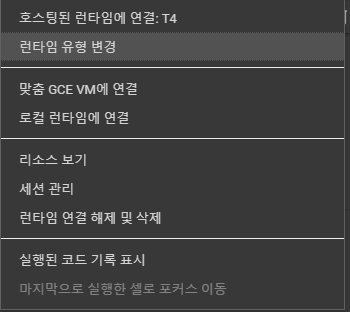

그 다음에 GPU나 TPU를 선택하자.

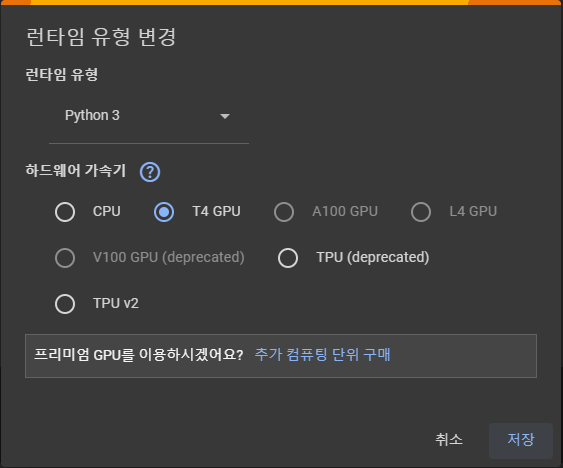

## Install Libraries

In [ ]:
!pip install -q numpy pandas altair scikit-learn tensorflow

## Convolution Layer
Convolution Neural Network의 핵심은 말 그대로 Convolution Layer다. Keras에서는 어떻게 구현할 수 있을까?


### 1-D Convolution Layer w 1-D Input

<div align='center'>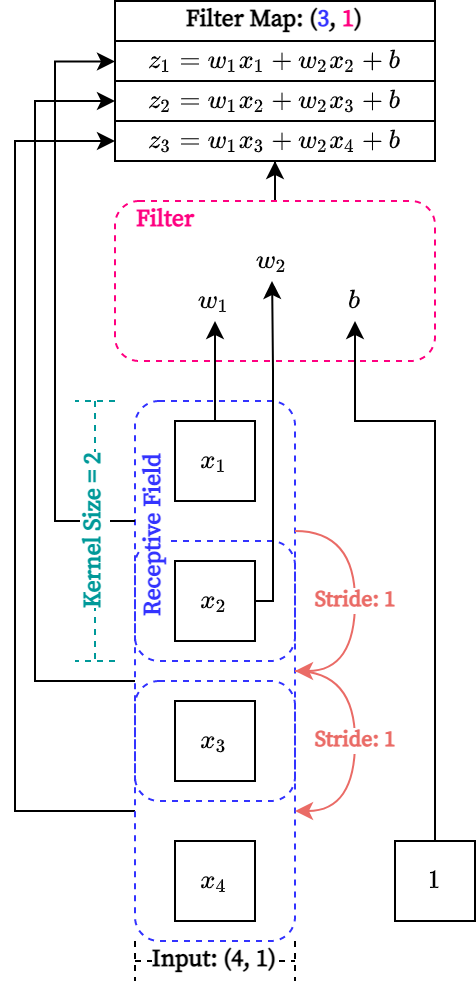</div>

위와 같은 Convolution Layer을 만들어보자. [keras.layers.Conv1D](https://keras.io/api/layers/convolution_layers/convolution1d/)를 사용하면 쉽게 행 방향 Convolution Operation을 수행하는 Convolution Layer를 만들 수 있다.

In [ ]:
from tensorflow import keras


model = keras.models.Sequential([
    keras.Input(
        shape=(4, 1)
    ),
    keras.layers.Conv1D(
        kernel_size=2, # Receptive Field의 크기를 의미한다
        strides=1, # Receptive Field를 움직일 Stride의 크기를 의미한다.
        filters=1, # Filter의 개수를 의미한다.
    )
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 3, 1)              3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


이전 시간에 했던 DNN과는 다르게, Input의 Shape가 바뀌었다!

DNN이었다면 1차원 데이터이니 다음과 같이 했을 것이다:
```python
keras.Input(
    shape=(1, )
)
```
하지만 CNN에서는 Stride 만큼 Receptive Field를 이동해가면서 Convolution 연산을 수행해야 한다. 따라서, Convolution Layer에 통과시킬 입력 데이터 묶음의 크기를  다음처럼 명시해야 한다.
```python
keras.Input(
    shape=(4, 1)
)
```
1차원 데이터가 4개씩 들어온다고 생각하면 된다.
예를 들어서, 이 데이터를 초당 1회씩 기록되는 심박수 데이터라고 생각해보자. 그럼 이 입력 구조는 **4초동안 모인 심박수 데이터**로부터 무엇인가를 예측하는 것이다.

어찌되었든 간에, 출력의 형태도 그렇고 매개변수의 수도 그렇고 우리가 그렸던 그림과 정확하게 일치하는 것을 알 수 있다.

The output shape and the number of parameters in the model are the same as the figure, right?

### 1-D Convolution Layer w/ $n$-D Input

이번엔 입력 데이터의 차원을 좀 더 늘려보자.

<div align='center'>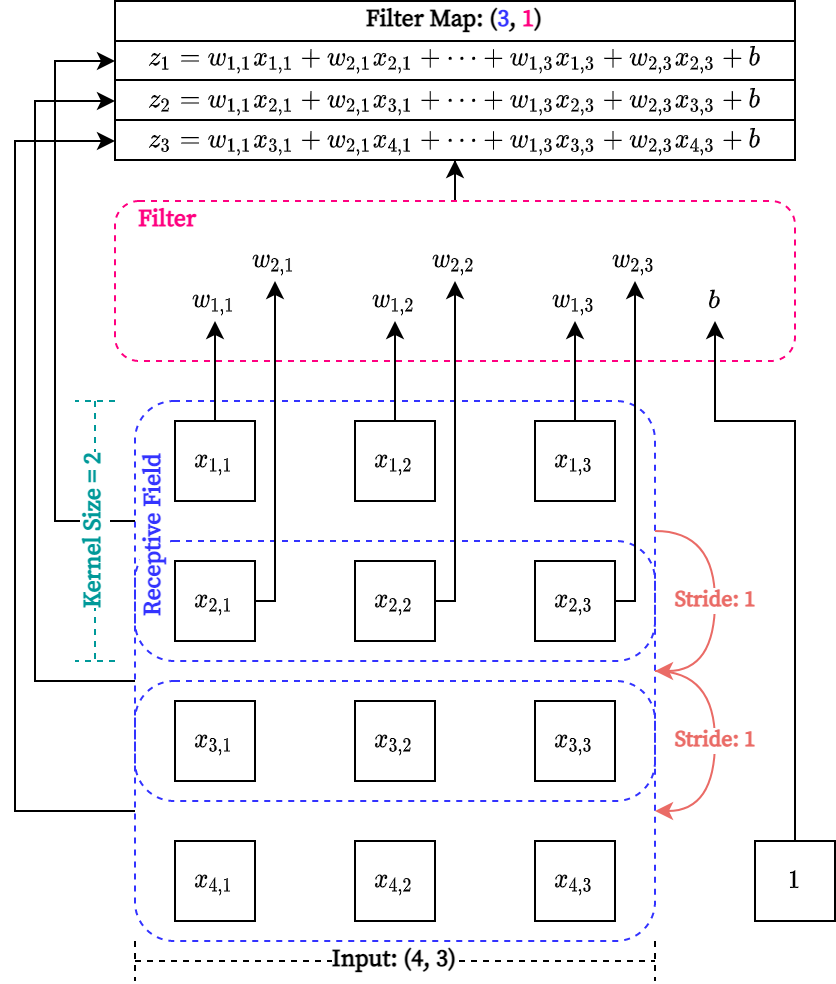</div>

In [ ]:
from tensorflow import keras


model = keras.models.Sequential([
    keras.Input(
        shape=(4, 3)
    ),
    keras.layers.Conv1D(
        kernel_size=2,
        strides=1,
        filters=1,
    )
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 3, 1)              7         
                                                                 
Total params: 7 (28.00 Byte)
Trainable params: 7 (28.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


역시 위의 그림과 일치하는 결과가 나온걸 알 수 있다.

### 1-D Convolution Layer w/ $n$-D Input and $n$ Filters

Filter의 수가 증가하면 어떻게 될까? Filter는 Weight들의 집합이니, Filter 갯수만큼 배로 매개변수들이 증가할 것이다. 게다가, 출력은 Filter 갯수만큼 열이 추가된다.

어렵게 생각할 필요가 없다. Filter를 Dense Layer의 Perceptron으로 생각해보면 각 Perceptron이 입력에 대응하는 매개변수들을 갖고 있고, Perceptron의 개수만큼 열이 생성된 것과 같다.

<div align='center'>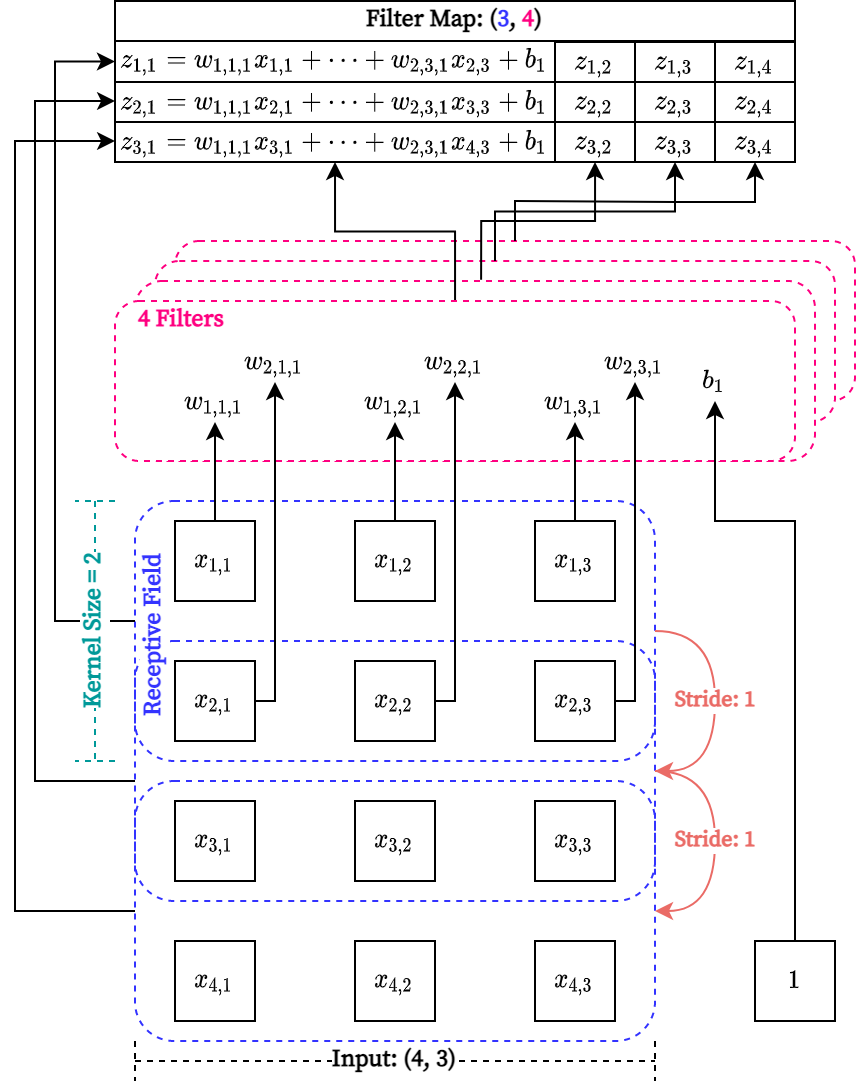</div>

In [ ]:
from tensorflow import keras


model = keras.models.Sequential([
    keras.Input(
        shape=(4, 3)
    ),
    keras.layers.Conv1D(
        kernel_size=2,
        strides=1,
        filters=4,
    )
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 3, 4)              28        
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


그럼, 이제 Convolution Layer에서 훈련하는 매개변수의 숫자를 일반적으로 써볼 수 있다.
* 가중치의 수: Receptive Field의 크기 X 입력 데이터의 차원 수 X 필터 개수
* 편차의 수: 필터의 개수

위의 예제에서는 2 X 3 X 4 = 24개의 가중치, 1 X 4 = 4개의 편차로 이루어진다.

### $n$-D Convolution Layer


지금까지는 행 방향으로만 Convolution 연산을 수행했다. 열 방향에도 Convolution 연산을 수행하고 싶다면, [keras.layers.Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/), 행, 열, 그리고 행열에 직교하는 방향으로 Convolution 연산을 수행하고 싶다면 [keras.layers.Conv3D](https://keras.io/api/layers/convolution_layers/convolution3d/)를 쓰면 된다.


<div align='center'>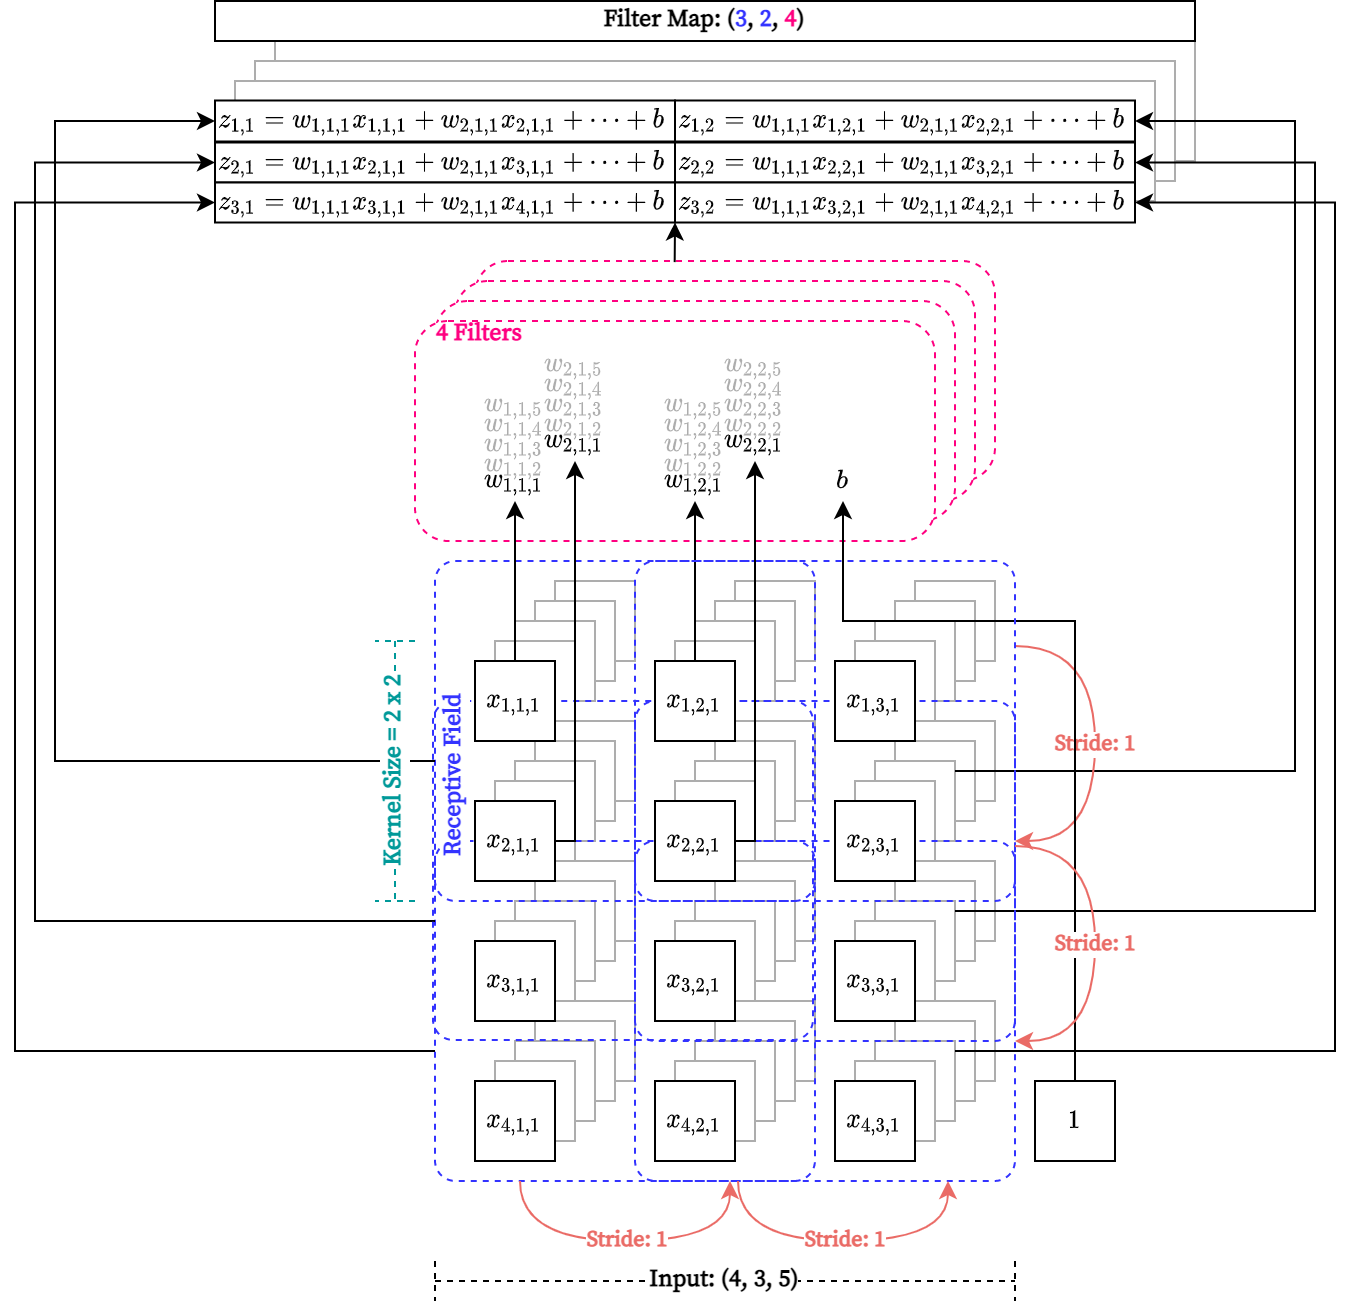</div>

위와 같이 2D Convolution 연산을 수행하는 Layer를 만들어보자.


In [ ]:
from tensorflow import keras


model = keras.models.Sequential([
    keras.layers.Conv2D(
        input_shape=(4, 3, 5),
        kernel_size=(2, 2),
        strides=1,
        filters=4,
    )
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 3, 2, 4)           84        
                                                                 
Total params: 84
Trainable params: 84
Non-trainable params: 0
_________________________________________________________________


총 84개의 매개변수가 만들어졌는데, 그 이유는 다음과 같다.
- 가중치: 80 =  4 (2 x 2) (Receptive Field 크기) * 5 (입력 차원) * 4 (필터)
- 편차: 4 = 4 필터





### Zero-Padding
그럼, 이번엔 Zero-Padding을 통해 입력 크기와 같은 크기의 출력을 내보자.


<div align='center'>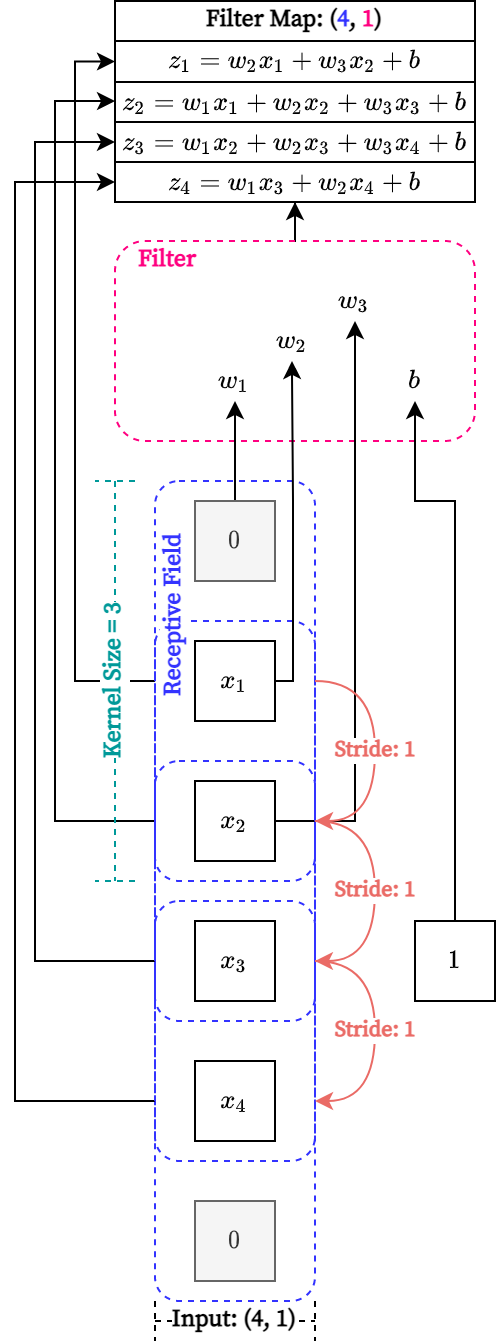</div>

별도의 Layer가 필요하진 않고, Convolution Layer 선언 시 **padding**이라는 인수를 변경하면 된다.
* padding = 'valid': Zero-Padding을 적용하지 않는다.
* padding = 'same': Zero-Padding을 적용한다.

In [ ]:
from tensorflow import keras


model = keras.models.Sequential([
    keras.layers.Conv1D(
        input_shape=(4, 1),
        kernel_size=3,
        strides=1,
        filters=1,
        padding="valid" # Zero-Padding 적용하지 않음
    )
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 1)              4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow import keras


model = keras.models.Sequential([
    keras.layers.Conv1D(
        input_shape=(4, 1),
        kernel_size=3,
        strides=1,
        filters=1,
        padding="same" # Zero-Padding 적용함
    )
])

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 4, 1)              4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


## Pooling Layer
Pooling Layer는 Convolution Layer의 출력을 중요한 정보를 남긴 채 크기를 줄이는, 즉 압축하는 역할을 한다.


### 1-D Pooling Layer
1D Pooling Layer는 크게 두 가지가 있다. Pool내의 입력들의 평균을 구하는 [keras.layers.AveragePooling1D](https://keras.io/api/layers/pooling_layers/average_pooling1d/), 최대값을 구하는 [keras.layers.MaxPooling1D](https://keras.io/api/layers/pooling_layers/max_pooling1d/)이다. 다음 그림과 같이 1D Pooling이 이루어진다.


<div align='center'>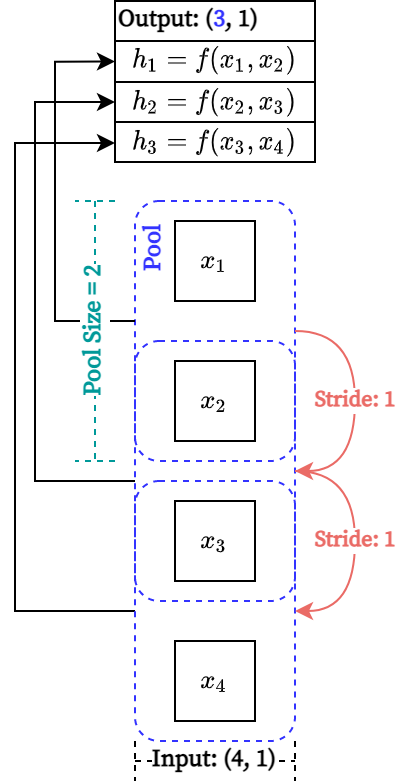</div>

In [ ]:
from tensorflow import keras


model = keras.models.Sequential([
    keras.layers.MaxPool1D(
        input_shape=(4, 1),
        pool_size=2,
        strides=1
    )
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling1d (MaxPooling1D  (None, 3, 1)             0         
 )                                                               
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


보다시피, Pooling에는 어떠한 매개변수도 없는 것을 알 수 있다.

보다 일반적으로, $n$-차원 입력에 대해 Stride를 2로 설정한 다음과 같은 1D Pooling을 구현해보자.

<div align='center'>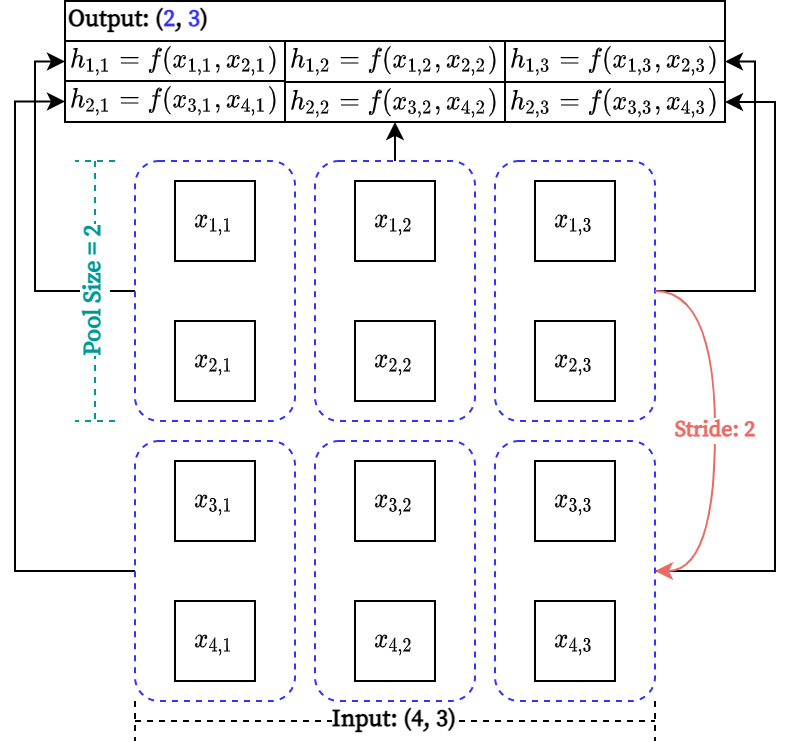</div>

In [ ]:
from tensorflow import keras


model = keras.models.Sequential([
    keras.layers.MaxPool1D(
        input_shape=(4, 3),
        pool_size=2,
        strides=2
    )
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling1d (MaxPooling1  (None, 2, 3)              0         
 D)                                                              
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### $n$-D Pooling Layer
물론, Convolution Layer처럼 Pooling 또한 2D 또는 3D로 움직일 수 있다. 위에서 사용한 1D Pooling 구현체 이름의 **1D**대신, **2D** 또는 **3D**로 바꿔주기만 하면 된다.

<div align='center'>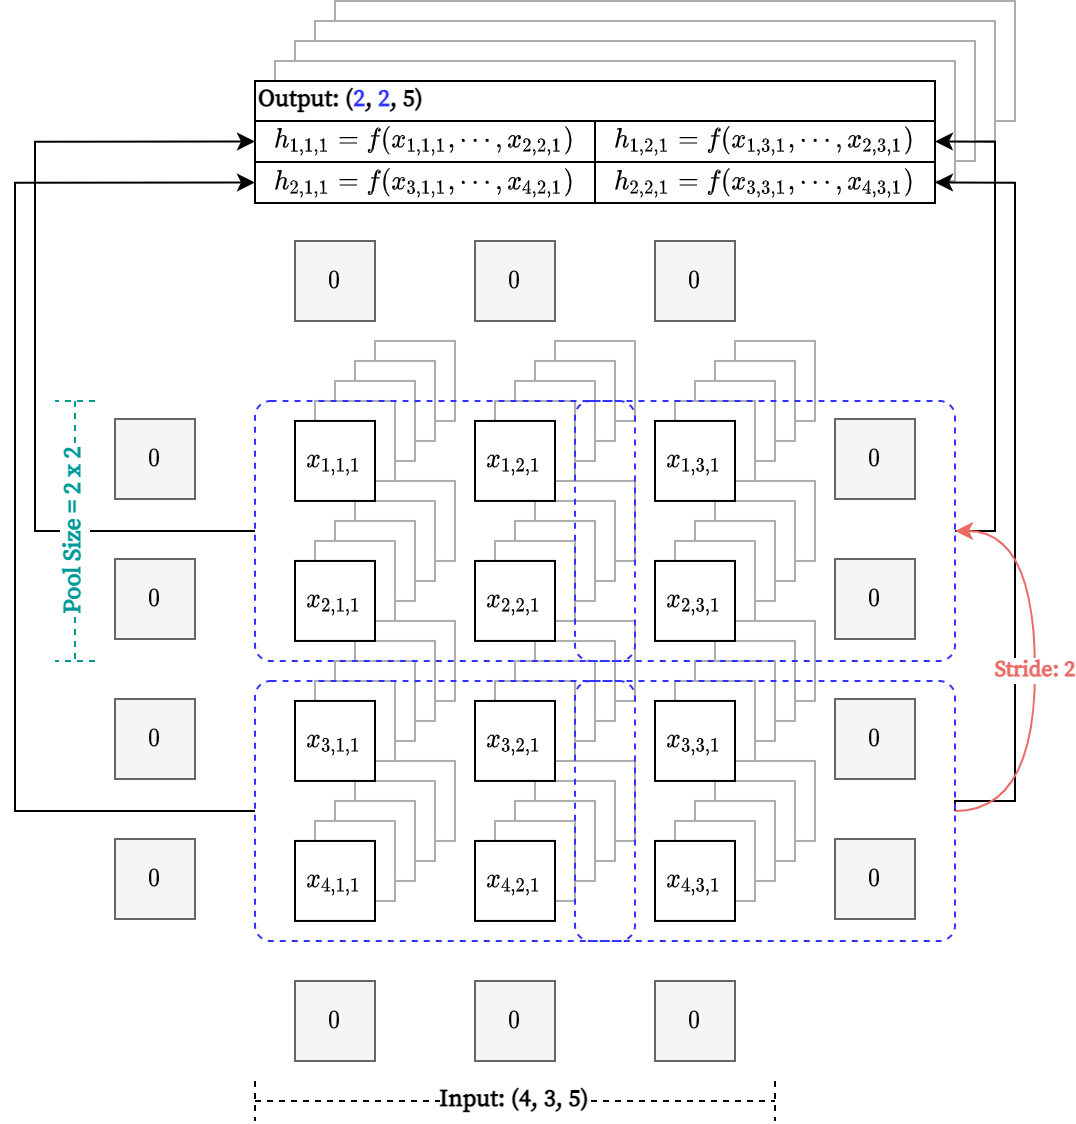</div>

In [ ]:
from tensorflow import keras


model = keras.models.Sequential([
    keras.layers.MaxPool2D(
        input_shape=(4, 3, 5),
        pool_size=2,
        strides=2,
        padding='same'
    )
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling2d (MaxPooling2  (None, 2, 2, 5)           0         
 D)                                                              
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Example: Fashion MNIST
그럼, 이제 Fasion MNIST에 대해서 지난 시간에 했던 DNN과 이번 시간에 한 CNN의 성능을 비교해보자.

### Preparation

지난 시간에 했던대로 데이터를 불러온 후 1D 벡터로 바꿔주겠다. 이 입력은 DNN에 들어갈 것이다.

In [ ]:
from tensorflow import keras
import numpy as np


(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0 # 0 ~ 255사이의 색상 값을 0 ~ 1로 바꿔주겠다.

X_train_1D, X_test_1D = X_train.reshape(X_train.shape[0], -1), X_test.reshape(X_test.shape[0], -1)

print(f'X_train_1D.shape: {X_train.shape}; y_train.shape: {y_train.shape}')
print(f'X_test_1D.shape: {X_test.shape}; y_train.shape: {y_test.shape}')

4422102/4422102 [==============================] - 0s 0us/step
X_train_1D.shape: (60000, 28, 28); y_train.shape: (60000,)
X_test_1D.shape: (10000, 28, 28); y_train.shape: (10000,)


역시, 재현성을 위해 Random Seed를 고정하자.

In [ ]:
from tensorflow import keras


keras.utils.set_random_seed(42)

### Deep Neural Network

<div align='center'>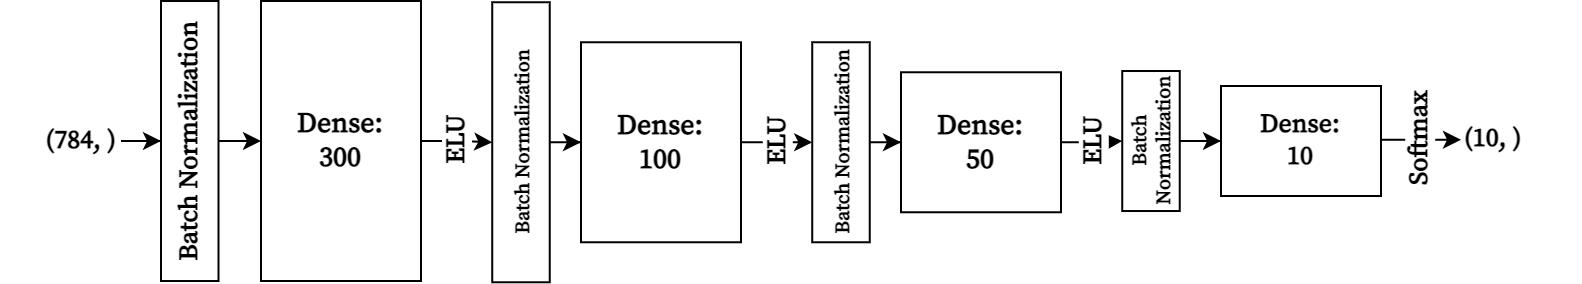</div>

지난 시간에 만들었던 DNN을 다시 훈련시켜보자.

In [ ]:
from tensorflow import keras


model_dnn = keras.models.Sequential([
    keras.Input(shape=(784, )),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(
        units = 300,
        activation=keras.activations.elu,
        kernel_initializer=keras.initializers.HeNormal(seed=42),
    ),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(
        units = 100,
        activation=keras.activations.elu,
        kernel_initializer=keras.initializers.HeNormal(seed=42),
    ),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(
        units = 50,
        activation=keras.activations.elu,
        kernel_initializer=keras.initializers.HeNormal(seed=42),
    ),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(
        units = 10,
        activation=keras.activations.softmax,
        kernel_initializer=keras.initializers.GlorotUniform(seed=42),
    )
])
model_dnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 batch_normalization_1 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 batch_normalization_2 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                      

In [ ]:
from tensorflow import keras


log_path = './logs/fashion-mnist-dnn'

model_dnn.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=[
             keras.metrics.SparseCategoricalAccuracy(),
    ]
)

model_dnn.fit(
    x=X_train_1D,
    y=y_train,
    batch_size=64,
    epochs=10,
    shuffle=True,
    validation_data = (X_test_1D, y_test),
    callbacks=[keras.callbacks.TensorBoard(log_dir=log_path, histogram_freq=1)]
)

Epoch 1/10
938/938 [==============================] - 14s 10ms/step - loss: 0.4470 - sparse_categorical_accuracy: 0.8397 - val_loss: 0.4187 - val_sparse_categorical_accuracy: 0.8469
Epoch 2/10
938/938 [==============================] - 12s 12ms/step - loss: 0.3438 - sparse_categorical_accuracy: 0.8733 - val_loss: 0.3624 - val_sparse_categorical_accuracy: 0.8684
Epoch 3/10
938/938 [==============================] - 7s 8ms/step - loss: 0.3048 - sparse_categorical_accuracy: 0.8876 - val_loss: 0.3371 - val_sparse_categorical_accuracy: 0.8799
Epoch 4/10
938/938 [==============================] - 8s 8ms/step - loss: 0.2786 - sparse_categorical_accuracy: 0.8961 - val_loss: 0.3374 - val_sparse_categorical_accuracy: 0.8770
Epoch 5/10
938/938 [==============================] - 7s 8ms/step - loss: 0.2557 - sparse_categorical_accuracy: 0.9041 - val_loss: 0.3306 - val_sparse_categorical_accuracy: 0.8832
Epoch 6/10
938/938 [==============================] - 8s 8ms/step - loss: 0.2357 - sparse_catego

### Convolution Neural Network
그 다음엔, 아래와 같은 CNN을 훈련시켜보자.

<div align='center'>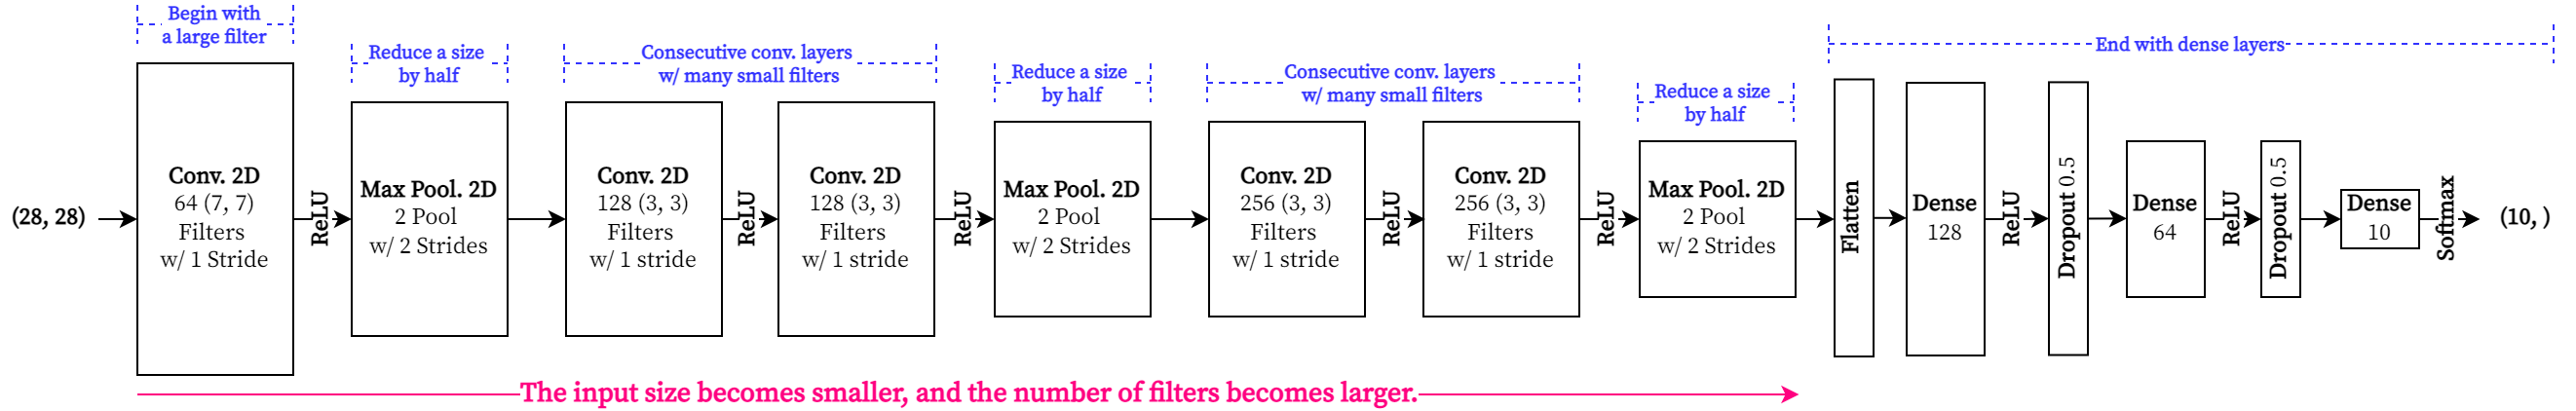</div>

In [ ]:
from tensorflow import keras


model_cnn = keras.models.Sequential([
    keras.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(
        filters=64,
        kernel_size=(7, 7),
        padding = "same",
        activation = keras.activations.relu,
        kernel_initializer=keras.initializers.HeNormal(seed=42),
    ),
    keras.layers.MaxPooling2D(
        pool_size=2
    ),
    keras.layers.Conv2D(
        filters=128,
        kernel_size=(3, 3),
        padding = "same",
        activation = keras.activations.relu,
        kernel_initializer=keras.initializers.HeNormal(seed=42),
    ),
    keras.layers.Conv2D(
        filters=128,
        kernel_size=(3, 3),
        padding = "same",
        activation = keras.activations.relu,
        kernel_initializer=keras.initializers.HeNormal(seed=42),
    ),
    keras.layers.MaxPooling2D(
        pool_size=2
    ),
    keras.layers.Conv2D(
        filters=256,
        kernel_size=(3, 3),
        padding = "same",
        activation = keras.activations.relu,
        kernel_initializer=keras.initializers.HeNormal(seed=42),
    ),
    keras.layers.Conv2D(
        filters=256,
        kernel_size=(3, 3),
        padding = "same",
        activation = keras.activations.relu,
        kernel_initializer=keras.initializers.HeNormal(seed=42),
    ),
    keras.layers.MaxPooling2D(
        pool_size=2
    ),
    keras.layers.Flatten(), # Flatten Layer는 2D 입력을 1D 로 바꿔주는 역할을 한다.
    keras.layers.Dense(
        units = 128,
        activation=keras.activations.relu,
        kernel_initializer=keras.initializers.HeNormal(seed=42),
    ),
    keras.layers.Dropout(
        rate=0.5
    ),
    keras.layers.Dense(
        units = 64,
        activation=keras.activations.relu,
        kernel_initializer=keras.initializers.HeNormal(seed=42),
    ),
    keras.layers.Dropout(
        rate=0.5
    ),
    keras.layers.Dense(
        units = 10,
        activation=keras.activations.softmax,
        kernel_initializer=keras.initializers.GlorotUniform(seed=42),
    )
])
model_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)        

In [ ]:
from tensorflow import keras


log_path = './logs/fashion-mnist-cnn'

model_cnn.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(),
    ]
)

model_cnn.fit(
    x=X_train,
    y=y_train,
    batch_size=64,
    epochs=10,
    shuffle=True,
    validation_data = (X_test, y_test),
    callbacks=[keras.callbacks.TensorBoard(log_dir=log_path, histogram_freq=1)]
)

Epoch 1/10
938/938 [==============================] - 18s 12ms/step - loss: 0.9058 - sparse_categorical_accuracy: 0.6722 - val_loss: 0.4122 - val_sparse_categorical_accuracy: 0.8542
Epoch 2/10
938/938 [==============================] - 11s 11ms/step - loss: 0.4627 - sparse_categorical_accuracy: 0.8432 - val_loss: 0.3426 - val_sparse_categorical_accuracy: 0.8776
Epoch 3/10
938/938 [==============================] - 11s 12ms/step - loss: 0.3753 - sparse_categorical_accuracy: 0.8744 - val_loss: 0.3091 - val_sparse_categorical_accuracy: 0.8893
Epoch 4/10
938/938 [==============================] - 13s 14ms/step - loss: 0.3266 - sparse_categorical_accuracy: 0.8906 - val_loss: 0.2757 - val_sparse_categorical_accuracy: 0.9044
Epoch 5/10
938/938 [==============================] - 12s 13ms/step - loss: 0.2982 - sparse_categorical_accuracy: 0.9002 - val_loss: 0.2775 - val_sparse_categorical_accuracy: 0.9038
Epoch 6/10
938/938 [==============================] - 11s 12ms/step - loss: 0.2646 - spars

보다시피, 우리의 CNN은 이전 시간에 했던 DNN 보다는 구조가 많이 복잡해진지라 매개변수의 수가 5배 이상 많아졌다.

물론, 그만큼 성능은 DNN보다 잘 나오는 것을 알 수 있다.

## More Example: Global Pooling

눈치가 빠른 학생들이라면 위 CNN 구조에 대해서 뭔가 이상한 것을 느꼈을 것이다. 한창 Convolution Layer로 Spatial Relationship을 추출하다가, 뒤에서 Flatten을 통해 펼쳐버린 것이다. 마지막은 10개의 Perceptron과 Softmax로 구성된 Layer로 끝내야하다보니 어쩔 수 없이 펼쳐버린 것인데, 이러면 정작 열심히 추출한 Spatial Relationship이 사라지는 꼴이된다. 어떻게 하면 이를 보존할 수 있을까?

대표적인 방법으로는 Global Pooling 방법이 있다. 일반적인 Pooling Layer의 경우 Pool 내의 입력값들 중 평균 또는 최대를 뽑아내는 반면, Global Pooling은 전체 입력 공간에서 평균 또는 최대를 뽑아낸다. 다음 그림과 같은 CNN을 만들어보자.

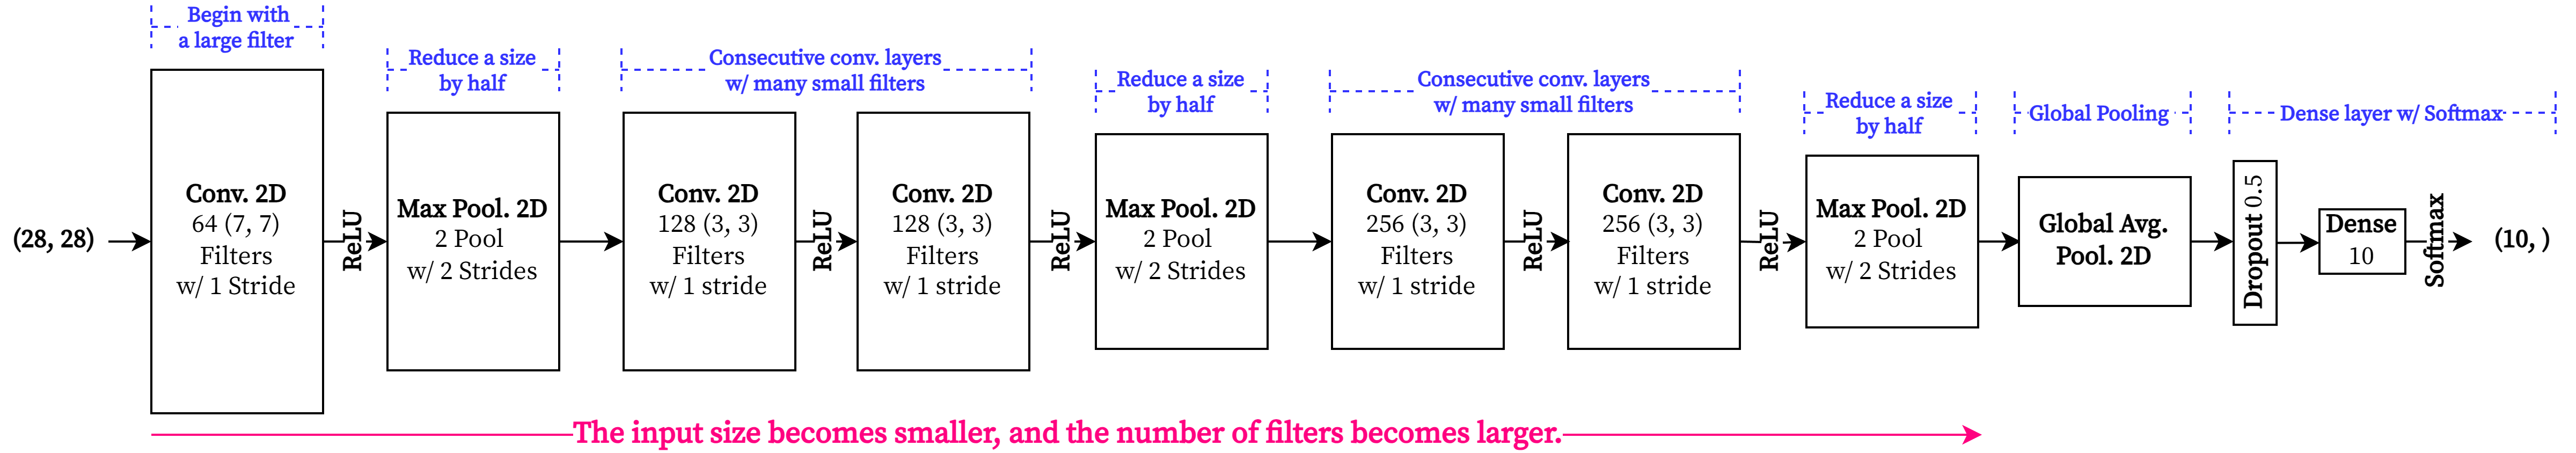

In [ ]:
from tensorflow import keras


model_cnn2 = keras.models.Sequential([
    keras.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(
        filters=64,
        kernel_size=(7, 7),
        padding = "same",
        activation = keras.activations.relu,
        kernel_initializer=keras.initializers.HeNormal(seed=42),
    ),
    keras.layers.MaxPooling2D(
        pool_size=2
    ),
    keras.layers.Conv2D(
        filters=128,
        kernel_size=(3, 3),
        padding = "same",
        activation = keras.activations.relu,
        kernel_initializer=keras.initializers.HeNormal(seed=42),
    ),
    keras.layers.Conv2D(
        filters=128,
        kernel_size=(3, 3),
        padding = "same",
        activation = keras.activations.relu,
        kernel_initializer=keras.initializers.HeNormal(seed=42),
    ),
    keras.layers.MaxPooling2D(
        pool_size=2
    ),
    keras.layers.Conv2D(
        filters=256,
        kernel_size=(3, 3),
        padding = "same",
        activation = keras.activations.relu,
        kernel_initializer=keras.initializers.HeNormal(seed=42),
    ),
    keras.layers.Conv2D(
        filters=256,
        kernel_size=(3, 3),
        padding = "same",
        activation = keras.activations.relu,
        kernel_initializer=keras.initializers.HeNormal(seed=42),
    ),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(
        rate=0.5
    ),
    keras.layers.Dense(
        units = 10,
        activation=keras.activations.softmax,
        kernel_initializer=keras.initializers.GlorotUniform(seed=42),
    )
])
model_cnn2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_32 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 7, 7, 128)         0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 7, 7, 256)        

In [ ]:
from tensorflow import keras


log_path = './logs/fashion-mnist-cnn2'

model_cnn2.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(),
    ]
)

model_cnn2.fit(
    x=X_train,
    y=y_train,
    batch_size=64,
    epochs=10,
    shuffle=True,
    validation_data = (X_test, y_test),
    callbacks=[keras.callbacks.TensorBoard(log_dir=log_path, histogram_freq=1)]
)

Epoch 1/10
938/938 [==============================] - 12s 11ms/step - loss: 0.6267 - sparse_categorical_accuracy: 0.7669 - val_loss: 0.4039 - val_sparse_categorical_accuracy: 0.8538
Epoch 2/10
938/938 [==============================] - 10s 11ms/step - loss: 0.3523 - sparse_categorical_accuracy: 0.8716 - val_loss: 0.3294 - val_sparse_categorical_accuracy: 0.8791
Epoch 3/10
938/938 [==============================] - 10s 11ms/step - loss: 0.2898 - sparse_categorical_accuracy: 0.8956 - val_loss: 0.2880 - val_sparse_categorical_accuracy: 0.8953
Epoch 4/10
938/938 [==============================] - 10s 10ms/step - loss: 0.2532 - sparse_categorical_accuracy: 0.9074 - val_loss: 0.2547 - val_sparse_categorical_accuracy: 0.9072
Epoch 5/10
938/938 [==============================] - 10s 11ms/step - loss: 0.2302 - sparse_categorical_accuracy: 0.9164 - val_loss: 0.2457 - val_sparse_categorical_accuracy: 0.9136
Epoch 6/10
938/938 [==============================] - 10s 10ms/step - loss: 0.2075 - spars

바로 이전의 CNN보다 성능이 소폭 상승한 것을 알 수 있다.